In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

The Scope of this project is to analyze and identify key observations in the dataset and visually present the observations.

For now, my goals are to analyze:

1. Has life expectancy increased over time in the six nations?
2. Has GDP increased over time in the six nations?
3. Is there a correlation between GDP and life expectancy of a country?
4. What is the average life expectancy in these nations?
5. What is the distribution of that life expectancy?

I may add more obvious hypothesis to the above as I look at the dataset over the course of the project.

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head(20))
print(df.shape)

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

From a brief look at the dataset, we can see that it has 4 columns and 96 rows. The 3rd column name needs to be shortened in order to make it easier for us to use that in future calculations.

In [3]:
df.rename(columns = {"Life expectancy at birth (years)": "Expectancy" }, inplace=True)
print(df.head())

  Country  Year  Expectancy           GDP
0   Chile  2000        77.3  7.786093e+10
1   Chile  2001        77.3  7.097992e+10
2   Chile  2002        77.8  6.973681e+10
3   Chile  2003        77.9  7.564346e+10
4   Chile  2004        78.0  9.921039e+10


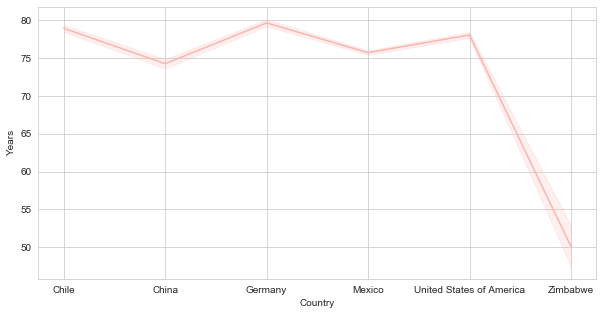

In [14]:
plt.figure(figsize=(10,5))
sns.set_palette('Pastel1')
sns.set_style('whitegrid')
sns.lineplot(data=df, x="Country", y="Expectancy")
plt.title("")
plt.xlabel('Country')
plt.ylabel('Years')
plt.show()